In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Load Data

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Observations:

Country and gender are categorical

Tenure, products_number,credit_card, active_member, churn, credit score,age, balance, and estimated_salary are numerical

Tenure and products_number have more than two distinc value

Churn columns seems to contain two distinct values

# Perform Data Cleaning

In [4]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
# check the unique values for each column
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [6]:
# number of missing values per column
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

all data are clean. So no need data cleaning

# Perform standard EDA



*   **Statistical summary of columns**







In [8]:
# group column names based on type
categoricals = ['country','gender']

numericals= ['credit_score','age','products_number','tenure','balance','estimated_salary', 'credit_card','active_member','churn']

In [10]:
# numerical statistical sumary
df[numericals].describe()

,credit_score,age,products_number,tenure,balance,estimated_salary,credit_card,active_member,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,1.530200,5.012800,76485.889288,100090.239881,0.70550,0.515100,0.203700
std,96.653299,10.487806,0.581654,2.892174,62397.405202,57510.492818,0.45584,0.499797,0.402769
min,350.000000,18.000000,1.000000,0.000000,0.000000,11.580000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,1.000000,3.000000,0.000000,51002.110000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,1.000000,5.000000,97198.540000,100193.915000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,2.000000,7.000000,127644.240000,149388.247500,1.00000,1.000000,0.000000
max,850.000000,92.000000,4.000000,10.000000,250898.090000,199992.480000,1.00000,1.000000,1.000000


Observation:
Mean ~ 50% (Median) in credit score, age, tenure, balance, and estimated salary indicating a symmetrical distribution

In [9]:
# describe method on categorical data
df[categoricals].describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [11]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of country column
France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64 

Value counts of gender column
Male      5457
Female    4543
Name: gender, dtype: int64 





*   **Univariate Analysis**




In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

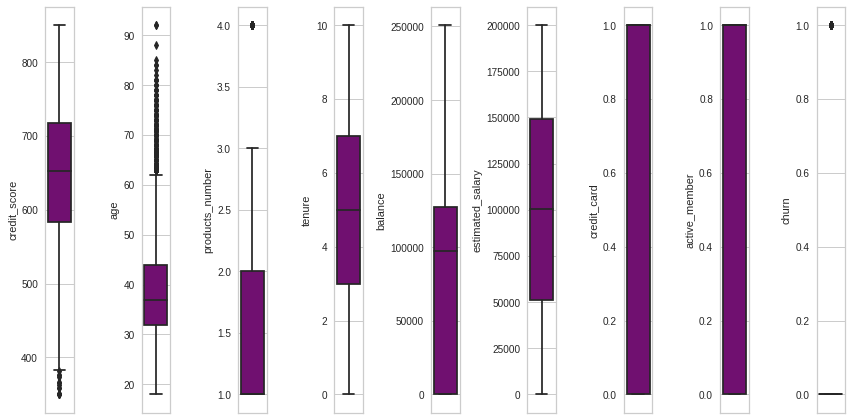

In [13]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='purple')
    plt.tight_layout()

Column credit score, age and product number have handful of outliers. the outliers are look extreme, but need to drop.

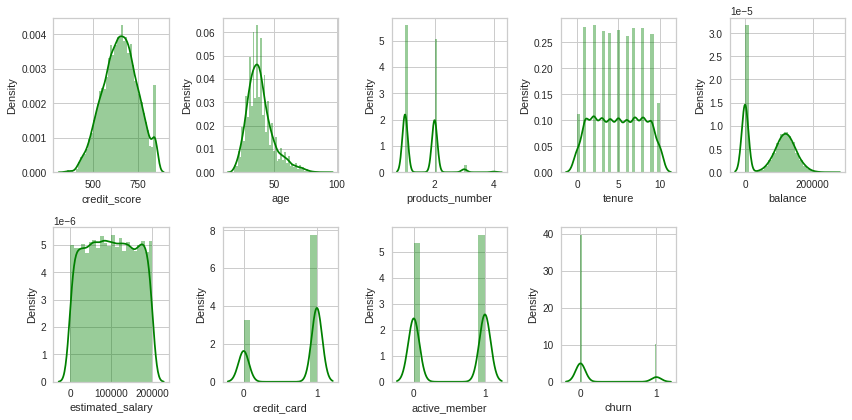

In [14]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:

In terms of the balance = 0 is more frequent in the dataset

Tenure with a value from 0 to 10

credit score is negatively skewed

age column is positively skewed

credit card, active member, and churn only have two values



*   **Multivariate analysis** 



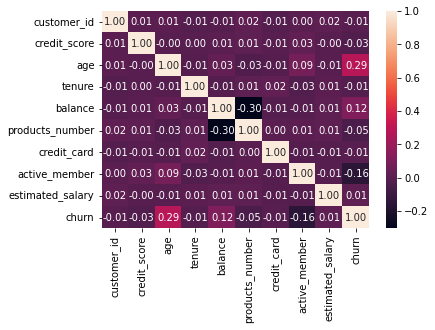

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Variables are not highly correlated each other

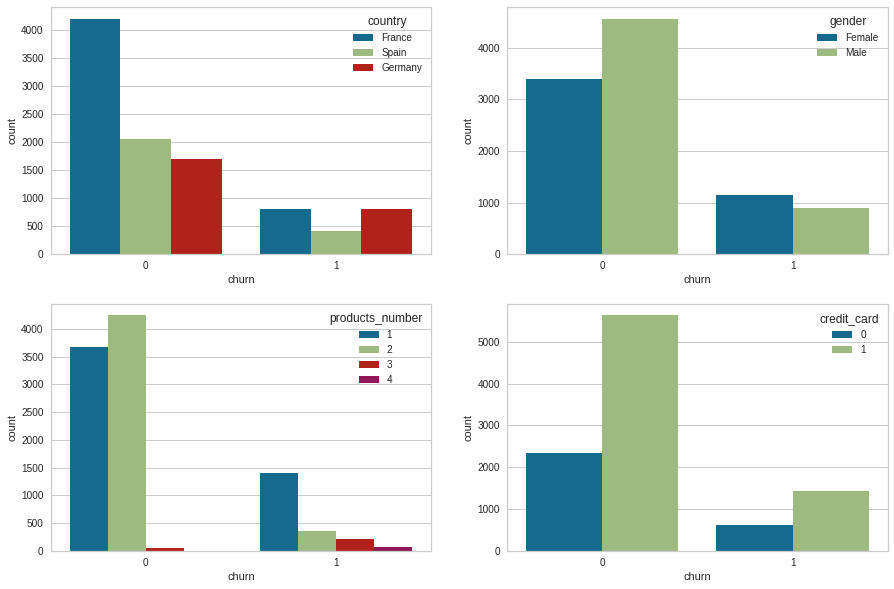

In [15]:
# understand categorical feature
_,axss = plt.subplots(2,2, figsize=[15,10])
sns.countplot(x='churn', hue='country', data=df, ax=axss[0][0])
sns.countplot(x='churn', hue='gender', data=df, ax=axss[0][1])
sns.countplot(x='churn', hue='products_number', data=df, ax=axss[1][0])
sns.countplot(x='churn', hue='credit_card', data=df, ax=axss[1][1])

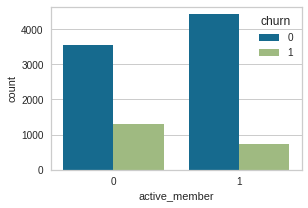

In [16]:
fig,axs=plt.subplots(figsize=(4.5,3))
sns.countplot(x='active_member',hue='churn',data=df)
plt.show()

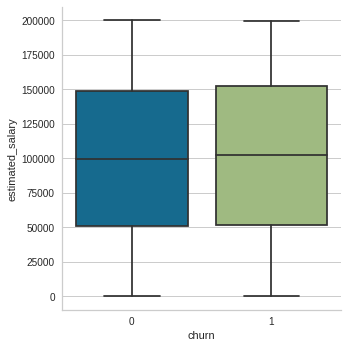

In [17]:
sns.catplot(x = 'churn', y="estimated_salary", kind="box", data = df)

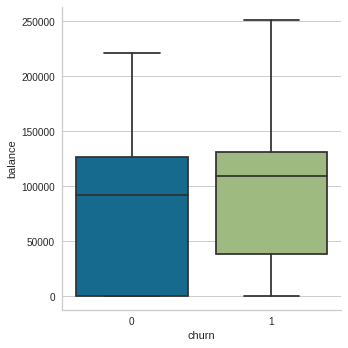

In [18]:
sns.catplot(x = 'churn', y="balance", kind="box", data = df)

EDA Conclusion
The data doesn't contain any major problems.
Overall, the minimum and maximum values make sense for each column. But, Mean >> and << 50% (Median) in credit score and age indicating somewhat a skewed distribution
From the barchart we can conclude that there are country who don't churn than do, more female and male customers who don't churn than do, customer who have credit card are willing to don't churn. But there are customer as a active member are who left the bank.
From the correlation heatmap it can be seen that variables are not highly correlated with each other



*   **Perform deep-dive exploration**



1. Does churn caused by poor service of bank that we can see from the number of product that the bank have?
2. Does churn can be observed by the customer's country?

In [ ]:
df.groupby(['products_number']).agg(
    Churn = ('churn','count')
)

,Churn
products_number,
1,5084
2,4590
3,266
4,60


In [ ]:
df.groupby(['country']).agg(
    Churn = ('churn','count')
)

,Churn
country,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
cat_cols = df.columns[df.dtypes == 'O']
num_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

In [ ]:
num_cols

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [ ]:
cat_cols

Index(['country', 'gender'], dtype='object')

# KNN

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values

Balancing Classes

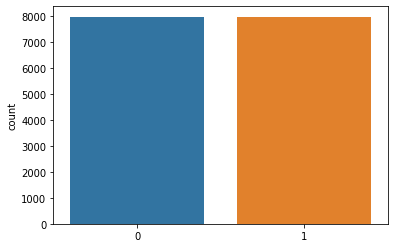

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()
X[:,1] = label_encoder_country.fit_transform(X[:,1])
X[:,2] = label_encoder_gender.fit_transform(X[:,2])

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard[0]

array([-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
       -1.33103279, -0.75606167,  0.6512495 ,  1.08223556,  0.00817382])

MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
obj_norm = MinMaxScaler().fit(X)
X_normalization = obj_norm.transform(X)
X_normalization[0]

array([0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
       0.        , 0.        , 1.        , 1.        , 0.50673489])

Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape

((11148, 10), (11148,))

In [ ]:
X_test.shape, y_test.shape

((4778, 10), (4778,))

K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

Here we use the GridSearch to figure out the best metrics to use in this model.

In [ ]:
k_list = list(range(1,31))

In [ ]:
k_values = dict(n_neighbors = k_list)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8848228106070207)

Running K Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
previsoes = knn.predict(X_test)

0.9028882377563834

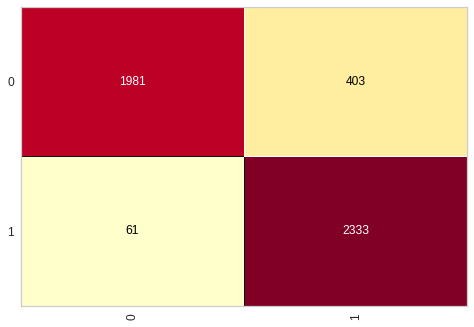

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

True Positives (TP) — The  value of actual clients have not left the bank and the value of predicted class also the same = 1981

True Negatives (TN) — The value of actual clients have left the bank and value of predicted class also the same = 2333



In [ ]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2384
           1       0.85      0.97      0.91      2394

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



Precision: among clients that predicted to stay, the real value is 0.97.among clients that predicted to left the bank, the real value is 0.85. 

Recall: among real number of clients that stay, predicted to be stayed is 0.83. among real number of clients that left the bank, predicted to be left is 0.97.